# **Experiment Notebook**



In [156]:
# Do not modify this code
!pip install -q utstd

from utstd.ipyrenders import *

In [157]:
# Do not modify this code
import warnings
warnings.simplefilter(action='ignore')

## 0. Import Packages

In [158]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import altair as alt

---
## A. Project Description


In [159]:
student_name = "Fang Yee Tan"
student_id = "25677648"

In [160]:
# Do not modify this code
print_tile(size="h1", key='student_name', value=student_name)

In [161]:
# Do not modify this code
print_tile(size="h1", key='student_id', value=student_id)

---
## C. Data Understanding

### C.1   Load Datasets


In [162]:
from pathlib import Path
file_path = Path.home() / "Desktop" / "36120" / "Assignment2"

X_train = pd.read_csv(file_path / "X_train.csv")
X_val = pd.read_csv(file_path / "X_val.csv")
X_test = pd.read_csv(file_path / "X_test.csv")
y_train = pd.read_csv(file_path / "y_train.csv").squeeze()
y_val = pd.read_csv(file_path / "y_val.csv").squeeze()
y_test = pd.read_csv(file_path / "y_test.csv").squeeze()

---
## D. Feature Selection


### D.1 Approach "XGBoost Feature Importance"

In [163]:
X_train.columns

Index(['relative_humidity_2m_mean', 'cloud_cover_mean', 'cloud_cover_max',
       'cloud_cover_min', 'wind_gusts_10m_mean', 'wind_speed_10m_mean',
       'dew_point_2m_mean', 'wet_bulb_temperature_2m_mean',
       'pressure_msl_mean', 'vapour_pressure_deficit_max',
       'shortwave_radiation_sum', 'precipitation_hours', 'temperature_2m_mean',
       'wind_gusts_10m_max', 'wind_speed_10m_max',
       'et0_fao_evapotranspiration', 'temperature_range', 'pressure_range',
       'wind_direction_sin', 'wind_direction_cos', 'rain_occurred',
       'rain_occurred_lag_1', 'rain_occurred_lag_2', 'rain_occurred_lag_3',
       'weather_code_0.0', 'weather_code_1.0', 'weather_code_2.0',
       'weather_code_3.0', 'weather_code_51.0', 'weather_code_53.0',
       'weather_code_55.0', 'weather_code_61.0', 'weather_code_63.0',
       'weather_code_65.0', 'month_1', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11', 'month_12'],

In [164]:
selected_features = ['relative_humidity_2m_mean', 'cloud_cover_mean',
       'cloud_cover_min', 'wind_gusts_10m_mean', 'wind_speed_10m_mean',
       'dew_point_2m_mean', 'wet_bulb_temperature_2m_mean',
       'pressure_msl_mean', 'precipitation_hours',
       'shortwave_radiation_sum', 'temperature_2m_mean',
        'wind_speed_10m_max',
       'et0_fao_evapotranspiration', 'pressure_range', 'rain_occurred']

X_train = X_train[selected_features]
X_val = X_val[selected_features]
X_test = X_test[selected_features]

In [165]:
feature_selection_1_insights = """From the previous experiment, month and weather code features show little predictive value and are therefore removed to simplify the model and reduce noise. Although some months like March, August and February appear in the top 10 feature importance, these months do not correspond to the actual rainy season, suggesting their importance may result from spurious correlations rather than meaningful seasonal patterns. Removing month and weather code features shifts the focus to the most relevant variables, improving model interpretability and reducing the risk of overfitting. Consequently, the top 15 remaining features are selected for further modeling, aiming to enhance predictive performance by relying only on the most informative and domain-relevant variables."""

In [166]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_1_insights', value=feature_selection_1_insights)

---
## I. Selection of Performance Metrics

> Provide some explanations on why you believe the performance metrics you chose is appropriate


In [167]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [168]:
# Critical Success Index (CSI)
def critical_success_index(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    csi = tp / (tp + fp + fn)
    return csi

In [169]:
performance_metrics_explanations = """Accuracy measures how well the model correctly predicts both rain and no-rain cases, providing an overall view of performance. However, due to the dataset’s imbalance, precision, recall, and F1-score offer more meaningful insights. In this project, the F1-score is the primary metric because it balances precision and recall, which is essential when both false positives and false negatives have significant impacts. The confusion matrix further breaks down prediction results into true positives, true negatives, false positives, and false negatives, giving a clearer picture of the model’s strengths and weaknesses. Additionally, the Critical Success Index (CSI) is introduced to assess forecast skill specifically in meteorological contexts. Together, these metrics provide a comprehensive evaluation of model effectiveness."""

In [170]:
# Do not modify this code
print_tile(size="h3", key='performance_metrics_explanations', value=performance_metrics_explanations)

## J. Train Machine Learning Model

Null hypothesis: The performance of the XGBoost model with feature selection is not significantly better than the performance of the XGBoost model using all features.

Alternative hypothesis: The performance of the XGBoost model with feature selection is significantly better than the performance of the XGBoost model using all features.

### J.1 Import Algorithm

In [171]:
!pip install xgboost

In [172]:
import xgboost
from xgboost import XGBClassifier

In [176]:
y_train.value_counts()

rain_or_not
0    3343
1    1403
Name: count, dtype: int64

In [177]:
scale_pos_weight = 3343 / 1403
scale_pos_weight

2.382751247327156

In [178]:
model = xgboost.XGBClassifier(
    objective='binary:logistic', 
    eval_metric='logloss',      
    use_label_encoder=False,     
    random_state=16,
    scale_pos_weight=2, # adjust the weight to 2 instead of 2.38
)

In [179]:
algorithm_selection_explanations = """XGBoost is considered a good fit because it focuses on misclassified instances by sequentially adding weak learners to the ensemble, thereby improving accuracy over iterations. It also offers a wide range of hyperparameters that can be tuned to capture complex relationships in the data."""

In [180]:
# Do not modify this code
print_tile(size="h3", key='algorithm_selection_explanations', value=algorithm_selection_explanations)

### J.2 Set Hyperparameters

> Provide some explanations on why you believe this algorithm is a good fit


In [181]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

In [182]:
param_grid = {
    'learning_rate': [0.05],
    'n_estimators': [100],
    'max_depth': [3],
    'subsample': [0.6],
    'colsample_bytree': [0.9], 
    'min_child_weight': [15]
}

In [183]:
# Time series cross validatio
tscv = TimeSeriesSplit(n_splits=5)

# Grid search
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=tscv,
    scoring='f1',
    n_jobs=-1,
)

# Fit grid search
grid_search.fit(X_train, y_train)

# Best parameters
print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best cross-validation F1 score: {grid_search.best_score_:.4f}")


Best parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 15, 'n_estimators': 100, 'subsample': 0.6}
Best cross-validation F1 score: 0.3410


/Users/fangyeetan/.pyenv/versions/3.11.4/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:00:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/fangyeetan/.pyenv/versions/3.11.4/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:00:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/fangyeetan/.pyenv/versions/3.11.4/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:00:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/fangyeetan/.pyenv/versions/3.11.4/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:00:04] WARNING: /Users/runner/work/xgboost/xgboost/

In [184]:
hyperparameters_selection_explanations = """The n_estimators parameter determines how many trees are used in the ensemble, directly influencing the model’s ability to capture patterns in the data. The learning_rate controls how much each tree contributes to the final prediction, with lower values slow the learning process but help prevent overfitting. The max_depth parameter sets a limit on how deep each tree can grow, helping to control model complexity and reduce the risk of learning from noise. Parameters such as subsample and colsample_bytree introduce randomness by restricting the fraction of training instances and features used for each tree, which enhances the model’s generalisation ability and mitigates overfitting. Lastly, min_child_weight specifies the minimum sum of instance weights required in a leaf node, acting as a form of regularisation that prevents the model from capturing overly specific patterns in the data."""

In [185]:
# Do not modify this code
print_tile(size="h3", key='hyperparameters_selection_explanations', value=hyperparameters_selection_explanations)

### J.3 Fit Model

In [146]:
best_model = grid_search.best_estimator_

### J.4 Model Technical Performance

In [147]:
# Predict on validation dataset
y_val_pred = best_model.predict(X_val)

In [148]:
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
csi_score = critical_success_index(y_val, y_val_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Critical Success Index (CSI): {csi_score:.2f}")

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

Accuracy: 0.64
Precision: 0.44
Recall: 0.41
F1 Score: 0.42
Critical Success Index (CSI): 0.27

Confusion Matrix:
[[186  61]
 [ 70  48]]


In [149]:
# Predict on testing dataset
y_test_pred = best_model.predict(X_test)

In [150]:
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
csi_score = critical_success_index(y_test, y_test_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Critical Success Index (CSI): {csi_score:.2f}")

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Accuracy: 0.54
Precision: 0.38
Recall: 0.43
F1 Score: 0.40
Critical Success Index (CSI): 0.25

Confusion Matrix:
[[139  90]
 [ 74  55]]


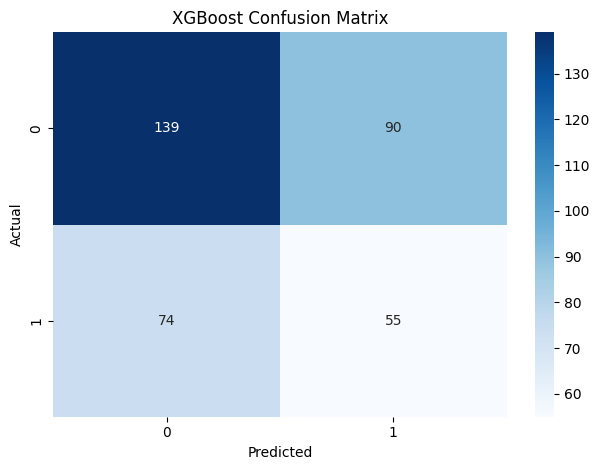

In [152]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

plt.figure()
sns.heatmap(conf_matrix, annot = True, cmap = 'Blues', fmt = 'd')

plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.tight_layout()
plt.show()

In [188]:
model_performance_explanations = """The lack of improvement after adjusting scale_pos_weight and selecting the top 15 features suggests that the model may have reached a performance plateau or is unable to effectively capture the underlying patterns in the data with the current setup. While class weighting is intended to address imbalance, reducing the weight slightly from 2.38 to 2 may have lessened the model’s emphasis on the minority class, potentially contributing to the drop in precision and accuracy. Meanwhile, the fact that recall and F1 score remain unchanged indicates the model is still struggling to correctly identify positive (rain) cases. This could point to limitations in feature representation, insufficient model complexity, or persisting overfitting. It may also suggest that the features, even the top-ranked ones, are not sufficiently informative on their own."""

In [189]:
# Do not modify this code
print_tile(size="h3", key='model_performance_explanations', value=model_performance_explanations)

### J.5 Business Impact from Current Model Performance

> Provide some analysis on the model impacts from the business point of view


In [190]:
business_impacts_explanations = """The results of the experiment show that both precision and recall are low, which negatively affects the model’s ability to support the business objective of accurately predicting rain events. Low recall indicates that the model fails to identify many actual rain events, leading to inadequate preparation, safety risks, and potential financial or operational losses. Low precision, on the other hand, means that many predicted rain events do not actually occur, which can result in unnecessary actions such as resource deployment or operational slowdowns. While both types of errors are undesirable, false negatives are likely to have a more severe impact from a business perspective, as failing to predict actual rain events carries higher risk and cost."""

In [191]:
# Do not modify this code
print_tile(size="h3", key='business_impacts_explanations', value=business_impacts_explanations)

## H. Project Outcomes

In [186]:
experiment_outcome = """Hypothesis Confirmed"""

In [187]:
# Do not modify this code
print_tile(size="h2", key='experiment_outcomes_explanations', value=experiment_outcome)

In [192]:
experiment_results_explanations = """After evaluating three different models, logistic regression demonstrates the best performance metrics despite its relative simplicity. This outcome suggests that more complex models, such as Random Forest and XGBoost, do not yield significant improvements for this specific problem, potentially due to limitations inherent in the dataset or the predictive capacity of the available features. Therefore, the subsequent experiment will focus on further refining logistic regression by eliminating less relevant features in order to enhance generalisation and mitigate overfitting. If no improvement is observed, the current approach may be considered a dead end. In that case, future research should consider exploring advanced weather forecasting models, incorporating additional external data sources, or engaging in deeper feature engineering to capture more relevant patterns. The expected uplift from feature reduction is moderate. Transitioning to domain-specific models or integrating more granular weather data may offer more substantial gains. """

In [193]:
# Do not modify this code
print_tile(size="h2", key='experiment_results_explanations', value=experiment_results_explanations)